In [1]:
import numpy as np

import torch
from torch import nn
from torch.optim import lr_scheduler
from torch.optim.lr_scheduler import _LRScheduler, ExponentialLR
from torch import optim
import torch.nn.functional as F

import matplotlib.pyplot as plt

In [2]:
parameters = nn.Parameter(torch.tensor([1.0]))

In [3]:
class ExponentialLRWithMin(ExponentialLR):
    def __init__(self, optimizer, gamma, eta_min, last_epoch=-1):
        self.eta_min = eta_min
        super().__init__(optimizer, gamma, last_epoch)

    def get_lr(self):
        return [max(lr, self.eta_min) for lr in super().get_lr()]

In [4]:
epochs = 300

optimizer = optim.Adam([parameters], lr=0.001 / 4)

# scheduler = ExponentialLRWithMin(optimizer, 0.92, eta_min=1.25e-5)
scheduler = lr_scheduler.CosineAnnealingWarmRestarts(optimizer, 3960, 1)
# scheduler = lr_scheduler.ExponentialLR(optimizer, 0.88)
# scheduler = lr_scheduler.CyclicLR(optimizer, 0.001, 0.01, step_size_up=40, gamma=0.9)

epochs = list(range(epochs * 132))

lrs = []
for e in epochs:
    lrs.append(optimizer.param_groups[0]['lr'])    
    scheduler.step()

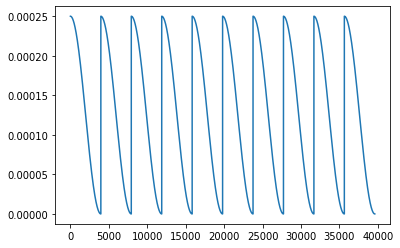

In [250]:
plt.plot(epochs, lrs);

In [251]:
min(lrs)

3.933592507276984e-11

In [ ]:
lrs[-1]